# THE SPARK FOUNDATION 

## TASK 1 : PREDICTION USING SUPERVISED ML

#### NAME : AKASH KESRWANI <br>
#### BATCH: DEC2021 <br>
#### DATASET : http://bit.ly/w-data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')


In [3]:
#Setting the plot size using 'rcParams'
plt.rcParams['figure.figsize']=[15,8]

## Read Data

In [4]:
#Reading csv file from a weblink
data=pd.read_csv(r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#will check the dimensions of the given data
data.shape

(25, 2)

In [6]:
#will cheeck the data types for each variable of given dataset
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
#checking the summery stats of all variables
#by default the describe function returns the summary of numerical variable
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [22]:
#Checking the missing values

#data.isnull().sum()

#checking the missing value and counts of missing values
data.isnull().sum().count

<bound method Series.count of Hours     0
Scores    0
dtype: int64>

###### Distribution of the variables

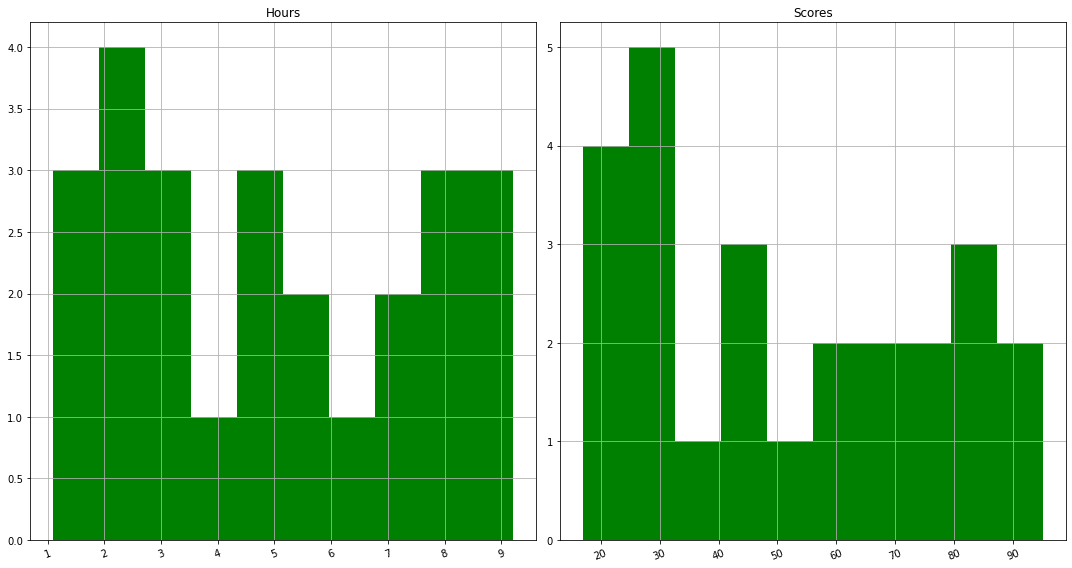

In [10]:
#plot the histogram of numeric variables
data.hist(xrot=20,color="green")

#adjust the subplot
plt.tight_layout()

#display the plot
plt.show()

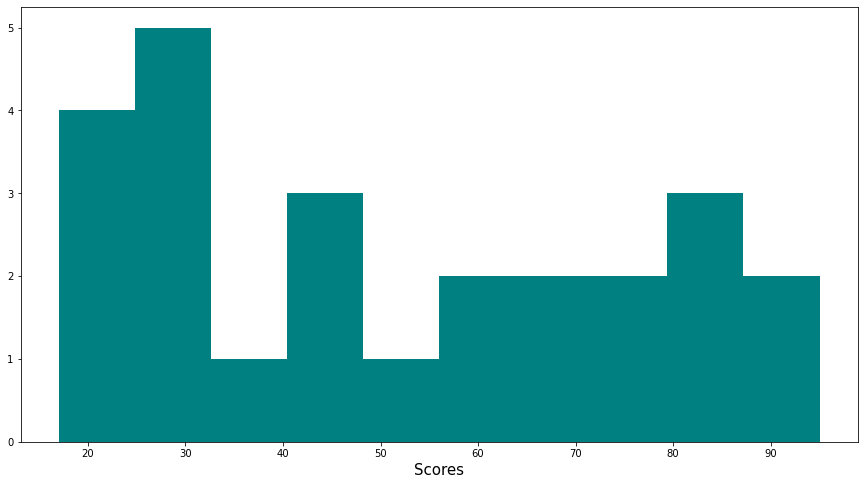

In [14]:
#frequency distribution
#set the xlabel and the fontsize
plt.xlabel("Scores",fontsize=15)

#plot the histogram for the target variables
plt.hist(data["Scores"],color='teal')
plt.show()

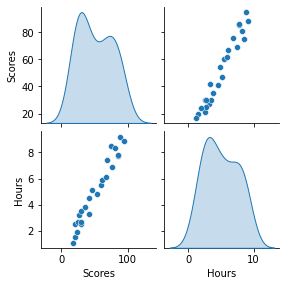

In [17]:
#Selecting the column of pairplot
columns=["Scores", "Hours"]
#draw the pairplot such that diagonal should be density plot and other graphs should be scatter plot
sns.pairplot(data[columns],size=2, kind="scatter", diag_kind="kde")

#display the plot
plt.show()

In [53]:
#Checking the skewness
from scipy.stats import skew 
skewness = data.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

Scores    0.219686
Hours     0.178722
dtype: float64

# correlation

In [28]:
#use the corr() function to generate the correlation matrix  of the numeric variables
corrmat=data.corr()

#print the correlation matrix
corrmat

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Plotting the heatmap for the correlation matrix

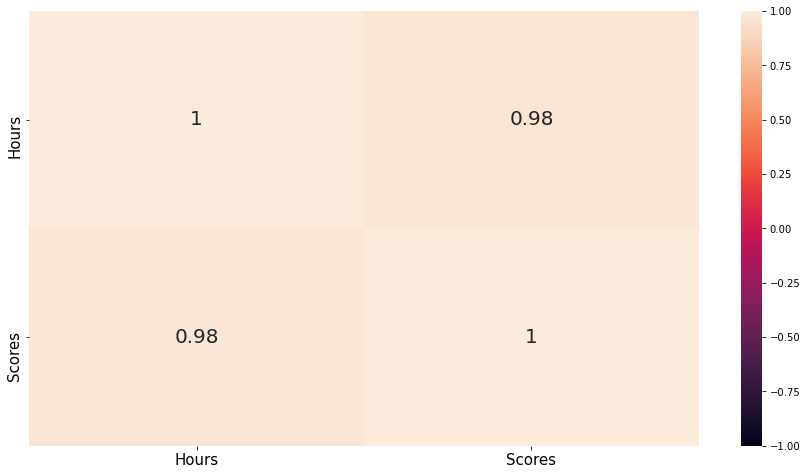

In [43]:
#set the plot size
plt.figure(figsize=(15,8))

#plotting the heatmap
#corr: give the correlation matrix
#cmap: color code used for plotting
#annot_kws: sets the font size of the annotation
#annot: prints the correlation values in the chart
#vmax: gives a maximum range of value for the chart
#vmin: gives a minimum range of values for the chart
sns.heatmap(corrmat, vmax=1.0, annot=True, vmin= -1.0, annot_kws={"size":20})

#set the size of x and y axes labels using 'fontsize'
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


#display the plot
plt.show()

# Check for normality

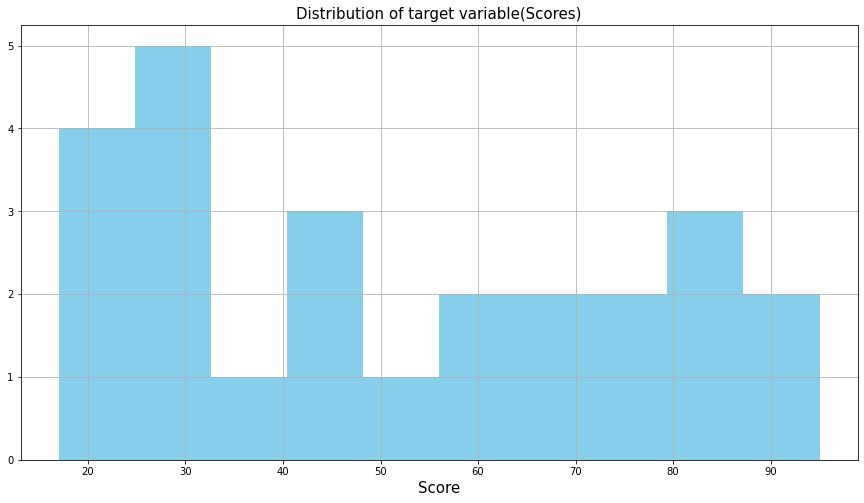

In [44]:
#checking the distribution of the target variable
data.Scores.hist(color='skyblue')

#add plot and axes labels
#set test sise using 'font_size'
plt.title("Distribution of target variable(Scores)",fontsize=15)
plt.xlabel("Scores",fontsize=15)
plt.xlabel("Score",fontsize=15)

#display the plot
plt.show()

# Modeling

In [137]:
#spliting the dataset into X and Y
X=data.iloc[:,0:-1].values
Y=data.iloc[:,-1].values

In [138]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [139]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2,random_state=0)

In [141]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

#train the model
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)


2.018160041434683
[9.91065648]


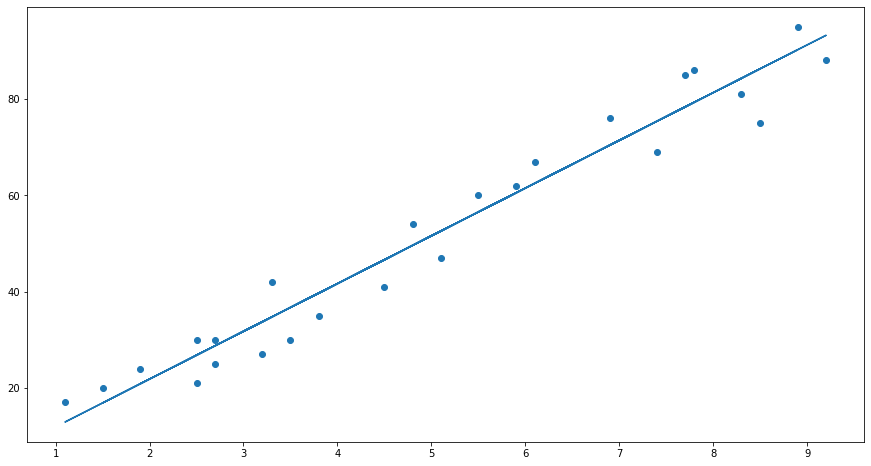

In [142]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [143]:
#predict using the model
Y_pred=lm.predict(X_test)

In [144]:
df=pd.DataFrame({"Actual":Y_test, "Predicted":Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evalution Matrix

In [145]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9454906892105356
4.6474476121003665
0.943120719176211


## RIDGE 

In [146]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train,Y_train)

#prediction
Y_pred_ridge=lm.predict(X_test)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

2.4350555519876735
[9.83109627]


In [147]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_ridge)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_ridge))
print("Root Mean Squared Error :",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.9469535028586777
Root Mean Squared Error : 4.584664003749623
0.9446471334177506


In [149]:
df1=pd.DataFrame({"Actual":Y_test, "Predicted":Y_pred_ridge})
df1

,Actual,Predicted
0,20,17.181700
1,27,33.894564
2,69,75.185168
3,30,27.012796
4,62,60.438524


## Predicted score of student who studies for 9.25 hours/day

In [150]:
print("The percenetage of student who studied 9.25 hour per day is", lm.predict([[9.25]]))

The percenetage of student who studied 9.25 hour per day is [93.37269604]
